In [10]:
import os
import numpy as np
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
IMGS_PATH = "../../bdd100k/images/10k"
MASKS_PATH = "../../bdd100k/labels/drivable/masks"
os.path.isdir(IMGS_PATH), os.path.isdir(MASKS_PATH)

(True, True)

In [3]:
# Train files
train_img_files = os.listdir(f"{IMGS_PATH}/train")
train_mask_files = os.listdir(f"{MASKS_PATH}/train")

# Val files
val_img_files = os.listdir(f"{IMGS_PATH}/val")
val_mask_files = os.listdir(f"{MASKS_PATH}/val")

print(val_img_files[:5])
print("*"*10)
print(val_mask_files[:5])

['a59131a5-00000000.jpg', '80c69c6d-c504878b.jpg', '81c893f6-127e8cb0.jpg', '9cc5345c-096b562a.jpg', 'a933bbf8-174d4128.jpg']
**********
['bab692c9-35904fdb.png', 'c87a6aba-757a0a27.png', 'bcfdd6af-c3d0b55a.png', 'b5cd3939-a7dffd2d.png', 'bf6789ed-4089397b.png']


In [4]:
# Are there equal number of train images and associated masks
print(len(train_img_files), len(train_mask_files))
# # Are there equal number of val images and associated masks
print(len(val_img_files), len(val_mask_files))

7000 70000
1000 10000


> Since BDD10K is a subset of BDD100K, let's try to find if all images has associated masks.

In [5]:
train_found = []
val_found = []

for file in tqdm(train_img_files):
    file_id = file.split('.')[0]
    if f"{file_id}.png" in train_mask_files:
        train_found.append(file_id)
        
for file in tqdm(val_img_files):
    file_id = file.split('.')[0]
    if f"{file_id}.png" in val_mask_files:
        val_found.append(file_id)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5099.90it/s]


In [6]:
print("Number of files in BDD10k (train) that has drivable masks: ", len(train_found))
print("Number of files in BDD10k (val) that has drivable masks: ", len(val_found))

Number of files in BDD10k (train) that has drivable masks:  2976
Number of files in BDD10k (val) that has drivable masks:  0


> Shoot! We cannot work with BDD10k.

In [8]:
idx = 0
sample = train_found[idx]
img_file = sample+'.jpg'
mask_file = sample+'.png'

In [12]:
img = Image.open(f"{IMGS_PATH}/train/{img_file}")

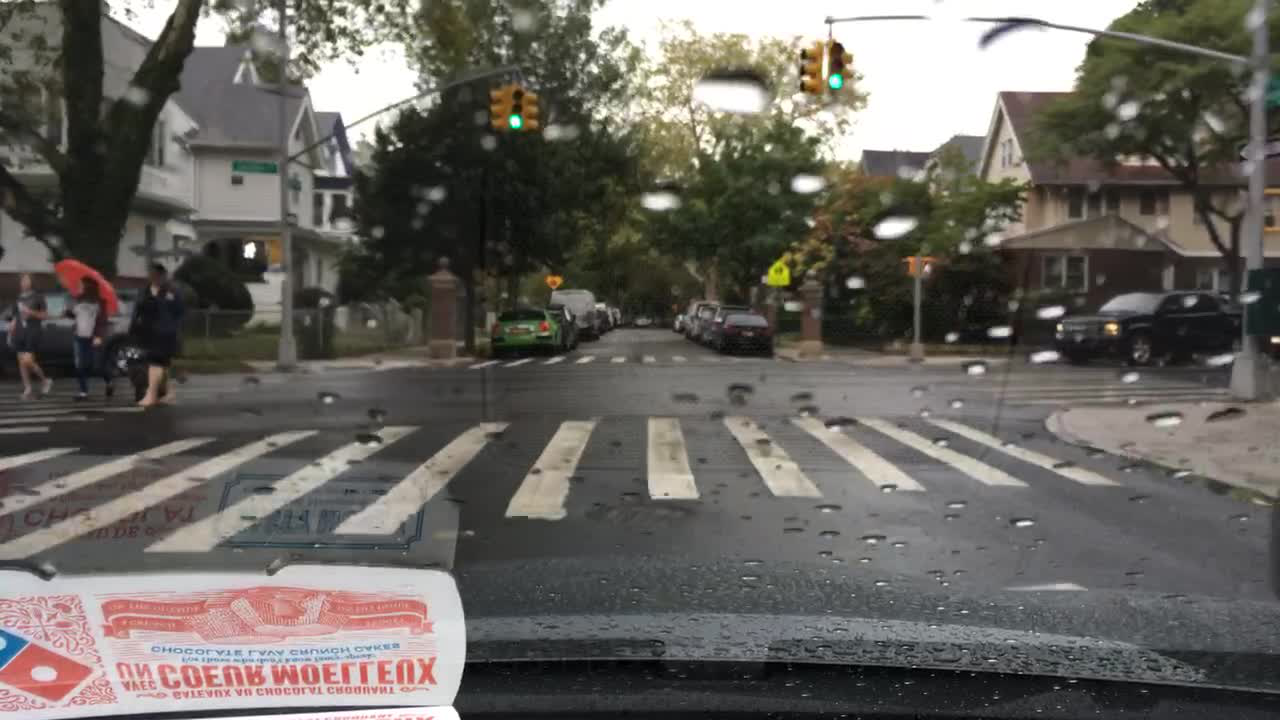

In [13]:
img

In [14]:
mask = Image.open(f"{MASKS_PATH}/train/{mask_file}")

In [22]:
mask = np.array(mask)

In [23]:
np.unique(mask)

array([0, 2], dtype=uint8)